<a href="https://colab.research.google.com/github/dilne/Multi-Image-Input-CNN-Preprocessing/blob/main/NotebookAndGuide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

Sometimes, you want multiple images as input to a CNN. This notebook contains easy to use code for preprocessing your images for multi-image input for a CNN. Just configure the "Variables for editing" section and run. This notebook will also provide a detailed walkthrough of what you need to know when using multiple images as input to a CNN.

The simplest way to use multiple images as input to a CNN is to merge their channels. In this example, we have two images of a cat and two images of a dog. The two cat images are of the same cat taken from the front and side and the dog images are of the same dog taken from the front and side. Each image has a width, height, and channels.

In [ ]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

### Variables for editing
These are the only variables you should have to edit.

- input_data_dir_0: Set this to be the directory for the first batch of images (e.g cat images)
- input_data_dir_1: Set this to be the directory for the second batch of images (e.g dog images)
- labels: The labels you want each combined image to have
- width: Width you want the images to be resized to
- height: Height you want the images to be resized to
- channels: Number of channels you want each image to have. If the image is greyscale to begin with, it already has only one channel, so keep this variable as 1. If the channel is a colour image, set this variable to 1 if you want it to be changed to a greyscale image, and 3 if you want to keep it as a colour image.

In [ ]:
input_data_dir_0 = "/content/drive/MyDrive/ Multi-Image-Input-CNN-Preprocessing/Data/Cat/"
input_data_dir_1 = "/content/drive/MyDrive/ Multi-Image-Input-CNN-Preprocessing/Data/Dog/"
# The labels you want each combined image to have
labels = [0, 1]
names = ["Cat", "Dog"]
labels_desc = ["Front", "Side"]
width = int(512)
height = int(512)
# If the image is greyscale already (has one channel), then set this to 1
# If the image is RGB (has three channels), and you want it to be greyscale, then set this to 1
# If the image is RGB (has three channels), and you want it to remain RGB, then set this to 3
channels = 3

In [ ]:
image_size = (width, height)

## Merge the Images

This code will run through each input directory and preprocess the images. It will combine two images that are next to eachother into one. Because of this, it's important to follow this filenaming system:
The files should be named so that they appear next to eachother in an alphabetically sorted list. One way to do this is to follow the naming system given in the example files. One corresponding set of images has the same number (e.g "0001") and is followed by "Front" or "Side". Therefore, the example files are named "Cat_0001_Front" and "Cat_0001_Side".

If you find this section too complicated, consider reading or running the code in the Appendix in place of this code. It offers the same functionality but is less condensed so may be easier to understand and follow.

In [ ]:
X = []  # list to store features
y = []  # list to store labels
extension = [".png", ".jpg", ".jpeg"]  # list of valid image extensions
data_dirs = [input_data_dir_0, input_data_dir_1]  # list of directories containing the images
labels = [0, 1]  # labels for the images in the respective directories

i = 0  # counter variable
for data_dir, label in zip(data_dirs, labels):
    for fname in sorted(os.listdir(data_dir)):
        if any(fname.endswith(ext) for ext in extension) and not fname.startswith("."):  # check if file is an image and not hidden
            i += 1
            path = os.path.join(data_dir, fname)  # construct full path to image
            feature = cv2.imread(path, cv2.IMREAD_COLOR if channels == 3 else cv2.IMREAD_GRAYSCALE)  # read image
            feature = cv2.resize(feature, (width, height))  # resize image
            if i % 2 == 0:  # check if the current image is the second in the pair
                feature_r = feature  # store the second image
                if len(feature_f.shape) == 2:
                    feature = np.stack((feature_f, feature_r), axis=-1)  # stack the images along the last axis
                elif feature_f.shape[2] == 3:
                    feature = np.concatenate((feature_f, feature_r), axis=-1)  # concatenate the images along the last axis
                X.append(feature)  # add the feature to the list
                y.append(label)  # add the label to the list
            else:
                feature_f = feature  # store the image


Convert data to numpy array. This is can be more useful for processing data for neural networks. Here, we change the data types.

In [ ]:
X = np.array(X)
y = np.array(y)
X = X.astype('float32') / 255.
y = y.astype('int')

Display information about the data.

In [ ]:
print("X:")
print(f"Samples: {len(X)}, Type: {X.dtype}, Shape: {X[0].shape}, Min: {X.min()}, Max: {X.max()}")
print()
print("Y:")
print(f"Samples: {len(y)}, Type: {y.dtype}")

X:
Samples: 2, Type: float32, Shape: (512, 512, 6), Min: 0.0, Max: 1.0

Y:
Samples: 2, Type: int64


## Display the Images
You may want to view the images again, to ensure there haven't been any errors during preprocessing. Here, we basically break down our images into their channel components and rebuild them as two seperate images.

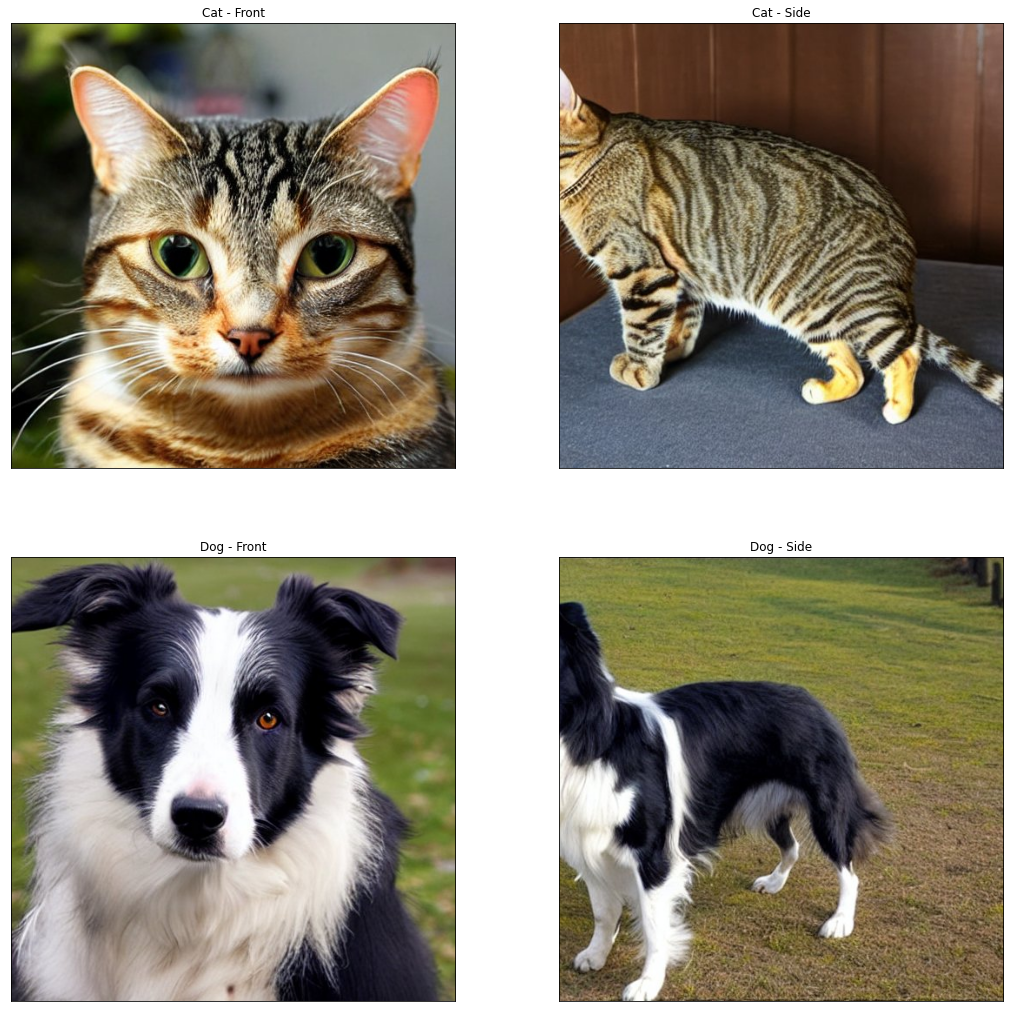

In [ ]:
# Set the size of the overall figure to 18x18 inches
plt.figure(figsize=(18,18))

# Define a function to plot an image
def plot_image(y_val, subplot_index):
    # Get a random image with the given label value
    rnd = random.choice([i for i, j in enumerate(y) if j == y_val])
    # Resize the image using OpenCV
    img = cv2.resize(X[rnd], image_size)
    # Multiply the image by 255 to scale the pixel values
    img *= 255
    if channels == 1:
        # Get the first channel of the image
        imgf = img[:,:,0]
        # Get the second channel of the image
        imgr = img[:,:,1]
        # Create a subplot with the first channel of the image
        ax1 = plt.subplot(2, 2, subplot_index)
        plt.gray()
        plt.imshow(imgf)
        # Set the title of the subplot to the label name
        plt.title("{} - {}".format(names[int(y[rnd])], labels_desc[0]))
        # Set the x and y axes to not visible
        ax1.get_xaxis().set_visible(False)
        ax1.get_yaxis().set_visible(False)
        # Create a subplot with the second channel of the image
        ax2 = plt.subplot(2, 2, subplot_index + 1)
        plt.gray()
        plt.imshow(imgr)
        # Set the title of the subplot to the label name
        plt.title("{} - {}".format(names[int(y[rnd])], labels_desc[1]))
        # Set the x and y axes to not visible
        ax2.get_xaxis().set_visible(False)
        ax2.get_yaxis().set_visible(False)
    elif channels == 3:
        imgf = [0,0,0]
        imgr = [0,0,0]
        # Get the red channel of the front image
        imgf[0] = img[:,:,2]
        # Get the green channel of the front image
        imgf[1] = img[:,:,1]
        # Get the blue channel of the front image
        imgf[2] = img[:,:,0]
        # Get the red channel of the side image
        imgr[0] = img[:,:,5]
        # Get the green channel of the side image
        imgr[1] = img[:,:,4]
        # Get the blue channel of the side image
        imgr[2] = img[:,:,3]
        # Convert the lists of channels to numpy arrays
        imgf = np.array(imgf)
        imgr = np.array(imgr)
        # Transpose the image so that the axes match the expected format
        imgf = imgf.transpose((1, 2, 0))
        imgr = imgr.transpose((1, 2, 0))
        # Normalize the image by dividing by 255
        imgf = imgf.astype('float32') / 255.
        imgr = imgr.astype('float32') / 255.        
        # Create a subplot with the first channel of the image
        ax1 = plt.subplot(2, 2, subplot_index)
        plt.imshow(imgf)
        # Set the title of the subplot to the label name
        plt.title("{} - {}".format(names[int(y[rnd])], labels_desc[0]))
        # Set the x and y axes to not visible
        ax1.get_xaxis().set_visible(False)
        ax1.get_yaxis().set_visible(False)
        # Create a subplot with the second channel of the image
        ax2 = plt.subplot(2, 2, subplot_index + 1)
        plt.imshow(imgr)
        # Set the title of the subplot to the label name
        plt.title("{} - {}".format(names[int(y[rnd])], labels_desc[1]))
        # Set the x and y axes to not visible
        ax2.get_xaxis().set_visible(False)
        ax2.get_yaxis().set_visible(False)

# Iterate through all the labels
for i in range(len(labels)):
    # Call the plot_image function for each label, passing the current label index and subplot index
    plot_image(i, i*2+1)

# Display the images
plt.show()

## CNN Input Shape
When defining the architecture of your CNN model for multiple image input, it is important to pay attention to the input shape. The number of channels should be set to either two or six, depending on how the data was preprocessed. For example:

- input_shape=(256, 256, 2) for greyscale image input
- input_shape=(256, 256, 6) for RGB image input

This notebook provides easy-to-use code for preprocessing your data, and the variables in the code can be used to easily set the input shape for your model. It is important to ensure that the input shape matches the preprocessed data to ensure the model can train correctly.

In [ ]:
input_shape=(width, height, channels)

## Appendix

### Merge the Images - Easier to Follow Code
This is the original code for the 'Merge the Images' section. It has the exact same effect but is not written as condensed as the new version. This version may be easier to follow and understand what the code is doing.

In [ ]:
X = []
y = []
extension = [".png", ".jpg", ".jpeg"]

i = 0
data_dir = input_data_dir_0
for fname in sorted(os.listdir(data_dir)):
    if any(fname.endswith(ext) for ext in extension) and not fname.startswith("."):
        i += 1
        if (i % 2) != 0:
            path = os.path.join(data_dir, fname)
            if channels == 1:
                feature_f = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            elif channels == 3:
                feature_f = cv2.imread(path, cv2.IMREAD_COLOR)
            feature_f = cv2.resize(feature_f, (width, height))

        else:
            path = os.path.join(data_dir, fname)
            if channels == 1:
                feature_r = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            elif channels == 3:
                feature_r = cv2.imread(path, cv2.IMREAD_COLOR)
            feature_r = cv2.resize(feature_r, (width, height))

            if len(feature_f.shape) == 2: # if there are only two dimensions because channels = 1
                feature = np.zeros((width, height, 2))
                feature [:,:,0] = feature_f
                feature [:,:,1] = feature_r
            elif feature_f.shape[2] == 3:
                feature = np.zeros((width, height, 6))
                feature [:,:,0] = feature_f[:,:,0]
                feature [:,:,1] = feature_f[:,:,1]
                feature [:,:,2] = feature_f[:,:,2]
                feature [:,:,3] = feature_r[:,:,0]
                feature [:,:,4] = feature_r[:,:,1]
                feature [:,:,5] = feature_r[:,:,2]
            X.append(feature)
            y.append(labels[0])

i = 0
data_dir = input_data_dir_1
for fname in sorted(os.listdir(data_dir)):
    if any(fname.endswith(ext) for ext in extension) and not fname.startswith("."):
        i += 1
        if (i % 2) != 0:
            path = os.path.join(data_dir, fname)
            if channels == 1:
                feature_f = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            elif channels == 3:
                feature_f = cv2.imread(path, cv2.IMREAD_COLOR)
            feature_f = cv2.resize(feature_f, (width, height))

        else:
            path = os.path.join(data_dir, fname)
            if channels == 1:
                feature_r = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            elif channels == 3:
                feature_r = cv2.imread(path, cv2.IMREAD_COLOR)
            feature_r = cv2.resize(feature_r, (width, height))

            if len(feature_f.shape) == 2: # if there are only two dimensions because channels = 1
                feature = np.zeros((width, height, 2))
                feature [:,:,0] = feature_f
                feature [:,:,1] = feature_r
            elif feature_f.shape[2] == 3:
                feature = np.zeros((width, height, 6))
                feature [:,:,0] = feature_f[:,:,0]
                feature [:,:,1] = feature_f[:,:,1]
                feature [:,:,2] = feature_f[:,:,2]
                feature [:,:,3] = feature_r[:,:,0]
                feature [:,:,4] = feature_r[:,:,1]
                feature [:,:,5] = feature_r[:,:,2]
            X.append(feature)
            y.append(labels[1])